In [77]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
#from sklearn import train_test_split

In [2]:
combats = pd.read_csv('./Python/Data/combats.csv')
pokemons = pd.read_csv('./Python/Data/pokemon.csv')
tests = pd.read_csv('./Python/Data/tests.csv')

In [3]:
pokemons.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [65]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [68]:
tests.head()

,First_pokemon,Second_pokemon
0,129,117
1,660,211
2,706,115
3,195,618
4,27,656


In [75]:
combats.loc[(combats['First_pokemon'] == 27) & (combats['Second_pokemon'] == 656)]
#combats.loc[(combats['First_pokemon'] == 129)]

,First_pokemon,Second_pokemon,Winner


In [5]:
#merge full dataset
half_data = combats.merge(pokemons,how='left', left_on=['First_pokemon'], right_on=['#'])
full_data = half_data.merge(pokemons,how='left', left_on=['Second_pokemon'], right_on=['#'],suffixes=('_1','_2'))

In [6]:
full_data.columns

Index(['First_pokemon', 'Second_pokemon', 'Winner', '#_1', 'Name_1',
       'Type 1_1', 'Type 2_1', 'HP_1', 'Attack_1', 'Defense_1', 'Sp. Atk_1',
       'Sp. Def_1', 'Speed_1', 'Generation_1', 'Legendary_1', '#_2', 'Name_2',
       'Type 1_2', 'Type 2_2', 'HP_2', 'Attack_2', 'Defense_2', 'Sp. Atk_2',
       'Sp. Def_2', 'Speed_2', 'Generation_2', 'Legendary_2'],
      dtype='object')

In [7]:
full_data.head()

,First_pokemon,Second_pokemon,Winner,#_1,Name_1,Type 1_1,Type 2_1,HP_1,Attack_1,Defense_1,...,Type 1_2,Type 2_2,HP_2,Attack_2,Defense_2,Sp. Atk_2,Sp. Def_2,Speed_2,Generation_2,Legendary_2
0,266,298,298,266,Larvitar,Rock,Ground,50,64,50,...,Grass,Dark,70,70,40,60,40,60,3,False
1,702,701,701,702,Virizion,Grass,Fighting,91,90,72,...,Rock,Fighting,91,129,90,72,90,108,5,True
2,191,668,668,191,Togetic,Fairy,Flying,55,40,85,...,Psychic,NaN,75,75,75,125,95,40,5,False
3,237,683,683,237,Slugma,Fire,NaN,40,40,40,...,Dragon,NaN,77,120,90,60,90,48,5,False
4,151,231,151,151,Omastar,Rock,Water,70,60,125,...,Bug,Rock,20,10,230,10,230,5,2,False


In [46]:
np.unique(full_data['Generation_1'])

array([1, 2, 3, 4, 5, 6])

In [29]:
y_pred = pd.DataFrame(np.where(combats['First_pokemon'] == combats['Winner'], 0, 1), columns=(['Winner']))
y_pred.head()

,Winner
0,1
1,1
2,1
3,1
4,0


In [59]:
'''gen_ord_map_p1 = {'p1_gen1': 1, 'p1_gen2': 2, 'p1_gen3': 3, 
               'p1_gen4': 4, 'p1_gen5': 5, 'p1_gen6': 6}'''

gen_ord_map_p1 = {1 : 'p1_gen1', 2 : 'p1_gen2', 3:'p1_gen3', 
            4: 'p1_gen4', 5:'p1_gen5', 6: 'p1_gen6'}
full_data['genlabel'] = full_data['Generation_1'].map(gen_ord_map_p1)

In [62]:
full_data[['genlabel','Generation_1']].head()

,genlabel,Generation_1
0,p1_gen2,2
1,p1_gen5,5
2,p1_gen2,2
3,p1_gen2,2
4,p1_gen1,1


In [82]:
# encode all type values 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# map generation labels
gen1 = LabelEncoder()
gen1_labels = gen1.fit_transform(full_data['Generation_1'])
full_data['Gen1_label'] = gen1_labels

# map legendary status
leg1 = LabelEncoder()
leg1_labels = leg1.fit_transform(full_data['Legendary_1'])
full_data['Leg1_label'] = leg1_labels

In [91]:
# generate 'generation' columns
generation = OneHotEncoder()
gen_features_arr = generation.fit_transform(full_data[['Generation_1']]).toarray()
gen_feature_labels = ['P1_Gen_' + str(g_label) for g_label in gen1.classes_]
gen_features = pd.DataFrame(gen_features_arr, columns = gen_feature_labels)

# generate 'legendary' columns
legend = OneHotEncoder()
leg_features_arr = legend.fit_transform(full_data[['Leg1_label']]).toarray()
leg_feature_labels = ['Legend_'+str(l_label) for l_label in leg1.classes_]
leg_features = pd.DataFrame(leg_features_arr, columns = leg_feature_labels)

/Users/satrya/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/satrya/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='au

In [95]:
poke1 = pd.concat([full_data, gen_features, leg_features])

/Users/satrya/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [97]:
poke1.columns

Index(['#_1', '#_2', 'Attack_1', 'Attack_2', 'Defense_1', 'Defense_2',
       'First_pokemon', 'Gen1_label', 'Generation_1', 'Generation_2', 'HP_1',
       'HP_2', 'Leg1_label', 'Legend_False', 'Legend_True', 'Legendary_1',
       'Legendary_2', 'Name_1', 'Name_2', 'P1_Gen_1', 'P1_Gen_2', 'P1_Gen_3',
       'P1_Gen_4', 'P1_Gen_5', 'P1_Gen_6', 'Second_pokemon', 'Sp. Atk_1',
       'Sp. Atk_2', 'Sp. Def_1', 'Sp. Def_2', 'Speed_1', 'Speed_2', 'Type 1_1',
       'Type 1_2', 'Type 2_1', 'Type 2_2', 'Winner', 'genlabel', 'leg1'],
      dtype='object')

In [22]:
features = full_data.drop(['First_pokemon','Second_pokemon','Generation_1','Generation_2','Legendary_1','Legendary_2','Winner','Name_1','#_1','Type 1_1','Type 2_1','Name_2','#_2','Type 1_2','Type 2_2'], axis=1)
features.columns

Index(['HP_1', 'Attack_1', 'Defense_1', 'Sp. Atk_1', 'Sp. Def_1', 'Speed_1',
       'HP_2', 'Attack_2', 'Defense_2', 'Sp. Atk_2', 'Sp. Def_2', 'Speed_2'],
      dtype='object')

In [25]:
features = features.drop(['Sp. Atk_1', 'Sp. Def_1', 'Speed_1', 'Sp. Atk_2', 'Sp. Def_2', 'Speed_2'], axis=1)

KeyError: "['Sp. Atk_1' 'Sp. Def_1' 'Speed_1' 'Sp. Atk_2' 'Sp. Def_2' 'Speed_2'] not found in axis"

In [26]:
features.columns

Index(['HP_1', 'Attack_1', 'Defense_1', 'HP_2', 'Attack_2', 'Defense_2'], dtype='object')

In [20]:
features.Legendary_1 = features.Legendary_1.astype(int)
features.Legendary_2 = features.Legendary_2.astype(int)


In [27]:
features.head()

,HP_1,Attack_1,Defense_1,HP_2,Attack_2,Defense_2
0,50,64,50,70,70,40
1,91,90,72,91,129,90
2,55,40,85,75,75,75
3,40,40,40,77,120,90
4,70,60,125,20,10,230


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(features)


/Users/satrya/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/satrya/miniconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [12]:
X[0]

array([-0.75432051, -0.4625508 , -0.76650973, -0.85184489, -0.79083415,
       -0.92920021,  0.03575944, -0.27874704, -1.08140504, -0.38794617,
       -1.15026223, -0.2844285 ])

In [30]:
X_train = X
y_train = y_pred.values

In [78]:
# divide data in train val & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_pred.values, test_size = 0.2, random_state=7)

In [83]:
y_train[0:20]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1]])

In [85]:
import keras
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam 
from keras.callbacks import TensorBoard
import numpy as np 
import pandas as pd

# define model
in_shape = (12,) # number of features
model = Sequential()
model.add(Dense(12, input_shape=in_shape, activation="relu"))
model.add(Dense(8, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(
    loss='binary_crossentropy',
    optimizer = 'adam',
    metrics=['acc']
)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________


In [86]:
history = model.fit(
    X_train, y_train, batch_size=10,
    epochs= 10
)

Epoch 1/10
40000/40000 [==============================] - 6s 139us/step - loss: 0.3512 - acc: 0.8878 1s - loss
Epoch 2/10
40000/40000 [==============================] - 5s 129us/step - loss: 0.2413 - acc: 0.9304
Epoch 3/10
40000/40000 [==============================] - 5s 128us/step - loss: 0.1991 - acc: 0.9386
Epoch 4/10
40000/40000 [==============================] - 5s 137us/step - loss: 0.1872 - acc: 0.9416
Epoch 5/10
40000/40000 [==============================] - 5s 135us/step - loss: 0.1817 - acc: 0.9435
Epoch 6/10
40000/40000 [==============================] - 5s 133us/step - loss: 0.1788 - acc: 0.9446
Epoch 7/10
40000/40000 [==============================] - 5s 128us/step - loss: 0.1758 - acc: 0.9454
Epoch 8/10
40000/40000 [==============================] - 5s 127us/step - loss: 0.1741 - acc: 0.9463
Epoch 9/10
40000/40000 [==============================] - 5s 129us/step - loss: 0.1721 - acc: 0.9476
Epoch 10/10
40000/40000 [==============================] - 5s 128us/step - loss: 

In [89]:
pred = model.predict(X_test)

In [90]:
pred[0:10]

array([[0.98246586],
       [0.96651447],
       [0.9974661 ],
       [0.05666346],
       [0.03918904],
       [0.9440795 ],
       [0.9985758 ],
       [0.02854846],
       [0.02811096],
       [0.994356  ]], dtype=float32)

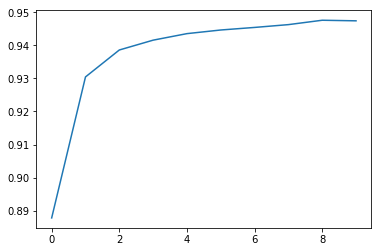

In [87]:
# plot metrics
plt.plot(history.history['acc'])
plt.show()

In [91]:
predictions = np.where(pred > 0.5, 1, 0)

In [92]:
predictions[0:10]

array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1]])

In [94]:
y_test[0:10]

array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1]])

In [95]:
print(metrics.accuracy_score(y_test, predictions))

0.9462


In [96]:
# confusion matrix
confusion = metrics.confusion_matrix(y_test, predictions)
print(confusion)

[[4515  252]
 [ 286 4947]]
